# Accelerating Cleantech Advancements through NLP-Powered Text Mining and Knowledge Extraction

***Team: Rebecca Gergess, Tejesh Reddy Koki, Sasa Ljubisavlijevic***

## Stage 1: Data Cleaning and Preprocessing and EDA

In [3]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer







In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rebeccag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

First we installed the required packages as seen above. 

# Data Collection and Cleaning.


The main topics of this section are the following: 

o Acquire a comprehensive dataset of cleantech texts.

o Perform data cleaning to remove irrelevant information, special characters, and duplicates.

In [5]:
# Setting the path and Loading the data from csv file
from pathlib import Path
print(Path.cwd())

data_folder = Path("dataset/cleantech_media_dataset_v1_20231109.csv")
data_folder


/Users/rebeccag/Desktop/CTA/CLT


PosixPath('dataset/cleantech_media_dataset_v1_20231109.csv')

In [6]:
# Opening the kaggle dataset file and assigning it to a variable
data = pd.read_csv(data_folder)
data.head()


,Unnamed: 0,title,date,author,content,domain,url
0,1280,Qatar to Slash Emissions as LNG Expansion Adva...,2021-01-13,NaN,"[""Qatar Petroleum ( QP) is targeting aggressiv...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
1,1281,India Launches Its First 700 MW PHWR,2021-01-15,NaN,"[""• Nuclear Power Corp. of India Ltd. ( NPCIL)...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
2,1283,New Chapter for US-China Energy Trade,2021-01-20,NaN,"[""New US President Joe Biden took office this ...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
3,1284,Japan: Slow Restarts Cast Doubt on 2030 Energy...,2021-01-22,NaN,"[""The slow pace of Japanese reactor restarts c...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...
4,1285,NYC Pension Funds to Divest Fossil Fuel Shares,2021-01-25,NaN,"[""Two of New York City's largest pension funds...",energyintel,https://www.energyintel.com/0000017b-a7dc-de4c...


In [7]:
print(data.shape)
data.info()

(9607, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9607 entries, 0 to 9606
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9607 non-null   int64 
 1   title       9607 non-null   object
 2   date        9607 non-null   object
 3   author      31 non-null     object
 4   content     9607 non-null   object
 5   domain      9607 non-null   object
 6   url         9607 non-null   object
dtypes: int64(1), object(6)
memory usage: 525.5+ KB


We have only 31 authors out 9607 rows of data, and due to data redundancy it is good to drop the authors and drop unneccessary columns

In [8]:
duplicate_rows = data[data.duplicated(subset=['title'])]

In [9]:
print(duplicate_rows)

      Unnamed: 0                                              title  \
820         6483  Macquarie targets North Sea as the green energ...   
891         6557  GE blocked from selling huge offshore turbine ...   
918         6584  Liz Truss opposes solar panels on farmland, Do...   
931         6597  Green hydrogen seen competing with LNG within ...   
987         6656  XR goes big on fake oil in protests at SLB, In...   
992         6661  Aberdeen’ s NZTC plans national centre for geo...   
998         6667  Truss, Johnson Join Rebellion Against Sunak fo...   
1034        6705  BEIS mulls ringfenced CfD support for geotherm...   
1047        6719  Key trends in UK renewables and what to expect...   
1057        6729  Five ways for the energy industry to shift the...   
1074        6747  Staggering potential in next-gen building bloc...   
1116        6790  Royal Opera House drops BP as sponsor after 33...   
3058       37413                   Cleantech Thought Leaders Series   
3059  

In [10]:
# Removing 'duplicate enteries' feature <- many duplicates exist in the dataset
data = data.drop_duplicates(subset=['title'], keep='first')

In [11]:
# Resetting index after deleting duplicates
data = data.reset_index(drop=True)

In [12]:
print(data.shape)


(9583, 7)


Out of 9607 -> 9583 rows of data is now having unique information and title after removing duplicates.

In [13]:
# Removing 'author' feature <- many authors are missing
data.drop('author', axis=1, inplace=True)

In [14]:
# Removing 'Unnamed columns' since it won't be used
data.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
# Check on the first row for content
data['content'][0]

'["Qatar Petroleum ( QP) is targeting aggressive cuts in its greenhouse gas emissions as it prepares to launch Phase 2 of its planned 48 million ton per year LNG expansion. In its latest Sustainability Report published on Wednesday, QP said its goals include `` reducing the emissions intensity of Qatar\'s LNG facilities by 25% and of its upstream facilities by at least 15%. \'\' The company is also aiming to reduce gas flaring intensity across its upstream facilities by more than 75% and has raised its carbon capture and storage ambitions from 5 million tons/yr to 7 million tons/yr by 2027. About 2.2 million tons/yr of the carbon capture goal will come from the 32 million ton/yr Phase 1 of the LNG expansion, also known as the North Field East project. A further 1.1 million tons/yr will come from Phase 2, known as the North Field South project, which will raise Qatar\'s LNG capacity by a further 16 million tons/yr. Qatar currently has an LNG production capacity of around 78 million tons

This first cleaning part has been conducted for the content of the urls of the cleantech dataset.

# Text Preprocessing

Furthermore, the steps For the text preprocessing are shown as follows:

o Tokenize the text data into words or phrases.

o Apply stemming or lemmatization to reduce words to their root form. 

o Remove stop words and non-informative terms.

o Convert text to lowercase for consistency.


In [16]:

# Define the cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    # Stemming
    porter = PorterStemmer()
    stemmed_tokens = [porter.stem(word) for word in tokens]
    # Join the tokens to form cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    return cleaned_text

# Apply the cleaning function to the 'content' column
data['cleaned_content'] = data['content'].apply(clean_text)


In [17]:
# Print the first few rows of 'cleaned_content' after cleaning
print("\nAfter Cleaning:")
print(data['cleaned_content'].head())


After Cleaning:
0    qatar petroleum qp target aggress cut greenhou...
1    nuclear power corp india ltd npcil synchron ka...
2    new us presid joe biden took offic week us chi...
3    slow pace japanes reactor restart continu cast...
4    two new york citi largest pension fund say div...
Name: cleaned_content, dtype: object


In [18]:
print(data['cleaned_content'][0])

qatar petroleum qp target aggress cut greenhous ga emiss prepar launch phase 2 plan 48 million ton per year lng expans latest sustain report publish wednesday qp said goal includ reduc emiss intens qatar lng facil 25 upstream facil least 15 compani also aim reduc ga flare intens across upstream facil 75 rais carbon captur storag ambit 5 million ton yr 7 million ton yr 2027 2 2 million ton yr carbon captur goal come 32 million ton yr phase 1 lng expans also known north field east project 1 1 million ton yr come phase 2 known north field south project rais qatar lng capac 16 million ton yr qatar current lng product capac around 78 million ton yr eye phase expans 126 million ton yr qp say abl elimin routin ga flare 2030 methan emiss limit set methan intens target 0 2 across facil 2025 compani also plan build 1 6 gigawatt solar energi capac 2025 half come siraj solar power project next year eif jan 22 20 month littl news phase 2 qatar massiv lng expans mcdermott intern said last week award

 # Explanatory Data Analysis

##### Basic Statistics -- Word Counts, Document Lengths, Term Frequencies

The topics to be covered in this part are as follows:

o Compute basic statistics such as word counts, document lengths, and term frequencies.

o Create word clouds to visualize the most frequent terms.

o Plot histograms or bar charts to analyze the distribution of major cleantech topics and
categories.

o Identify outliers or anomalies in the data.

o Visualize the distribution of texts with scatter plots or other suitable visualization techniques.

In [19]:

# calculate word counts, document lengths
# add simple word count
data['word_counts'] = data['cleaned_content'].apply(lambda x: len(str(x).split()))
#add simple document length
data['doc_length'] = data['cleaned_content'].apply(len)
# add polarity
data['polarity'] = data['cleaned_content'].map(lambda text: TextBlob(str(text)).sentiment.polarity)


In [20]:
polarity_fr = data['polarity'][0]
print(polarity_fr)

0.03446969696969697


We see a positive polarityb close to 0. We therefore conclude a positive sentiment that is close to neutral.

In [21]:
# Print basic statistics
print("Basic Statistics")
print("Word Counts", data['word_counts'].describe())
print("\nDocument Length ", data['doc_length'].describe())

Basic Statistics
Word Counts count    9583.000000
mean      480.142648
std       274.447403
min       112.000000
25%       272.000000
50%       415.000000
75%       616.000000
max      2092.000000
Name: word_counts, dtype: float64

Document Length  count     9583.000000
mean      3072.156423
std       1745.472816
min        716.000000
25%       1746.000000
50%       2655.000000
75%       3920.000000
max      13509.000000
Name: doc_length, dtype: float64


Explanation: 
The Statistics show a mean of 480 words per scrapped url with a standard ceviation almost 275 word.
A maximum 

In [22]:
data.describe(include= [np.number])

,word_counts,doc_length,polarity
count,9583.000000,9583.000000,9583.000000
mean,480.142648,3072.156423,0.074285
std,274.447403,1745.472816,0.075321
min,112.000000,716.000000,-0.361111
25%,272.000000,1746.000000,0.028325
50%,415.000000,2655.000000,0.073190
75%,616.000000,3920.000000,0.118283
max,2092.000000,13509.000000,0.597959


In [23]:
# Term Frequencies
# Compute term frequencies
vectorizer = CountVectorizer()
term_frequencies = vectorizer.fit_transform(data['cleaned_content'])

# Print term frequencies
print("Term Frequencies:")
print(term_frequencies)

Term Frequencies:
  (0, 42016)	5
  (0, 39882)	1
  (0, 42075)	6
  (0, 50411)	3
  (0, 6136)	2
  (0, 15619)	1
  (0, 23797)	1
  (0, 22215)	3
  (0, 19024)	3
  (0, 41267)	2
  (0, 30942)	1
  (0, 39984)	7
  (0, 40424)	2
  (0, 3556)	1
  (0, 34464)	9
  (0, 51629)	9
  (0, 39672)	1
  (0, 56750)	2
  (0, 31842)	8
  (0, 20255)	5
  (0, 30900)	1
  (0, 49841)	1
  (0, 43363)	1
  (0, 41757)	1
  (0, 55359)	1
  :	:
  (9582, 27077)	1
  (9582, 41429)	1
  (9582, 49079)	1
  (9582, 7827)	1
  (9582, 5812)	1
  (9582, 45151)	2
  (9582, 47461)	1
  (9582, 16902)	2
  (9582, 27173)	1
  (9582, 29639)	1
  (9582, 54563)	4
  (9582, 35413)	1
  (9582, 14829)	1
  (9582, 36559)	1
  (9582, 28173)	1
  (9582, 21867)	1
  (9582, 43939)	1
  (9582, 11995)	2
  (9582, 31826)	2
  (9582, 34406)	1
  (9582, 7782)	4
  (9582, 48976)	1
  (9582, 55962)	1
  (9582, 49124)	1
  (9582, 57033)	1


In [24]:
# Convert the sparse matrix to a dense array
dense_term_frequencies = term_frequencies.toarray()

# Print the dense array
print("Dense Term Frequencies:")
print(dense_term_frequencies)


Dense Term Frequencies:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Due to the vast size of vocabulary spaces, we typically operate with sparse matrices by default. It is possible to enhance the sparse matrix using .todense() and perform summations similar to a conventional dataframe. Let's examine the top 20 words.

In [43]:
#ngram_df = pd.Data(tfidf.todense(), columns=ngrams)
#ngram_df.head()

In [ ]:
#ngram_df.sum().sort_values(ascending=False)[:20]

In [44]:
#feature_names = vectorizer.get_feature_names_out()
#print("Feature Names:")
#print(feature_names)


Feature Names:
['00' '000' '0000' ... 'zwolinski' 'zx' 'zyryanov']


# Word co-occurence

We can also investigate word co-occurrences, identifying the words that commonly occur together within the same documents.

# Define a count vectorizer that will create binary flags indicating the presence of each word
count_vectorizer = CountVectorizer(
    max_df=.9,
    min_df=50,
    stop_words=list(stop_words),
    binary=True
)
# Transform the text into binary flags
counts = count_vectorizer.fit_transform(sample['Text'])
# Get the names of each column
ngrams = count_vectorizer.get_feature_names_out()
# Compute the product to get a co-occurrence matrix
cooccurs = (counts.T * counts)
# Fill the diagonal with zeroes
cooccurs.setdiag(0)
# Put it into a Pandas DataFrame to make it pretty
cooccurs = pd.DataFrame(cooccurs.todense(), index=ngrams, columns=ngrams)
cooccurs.head()

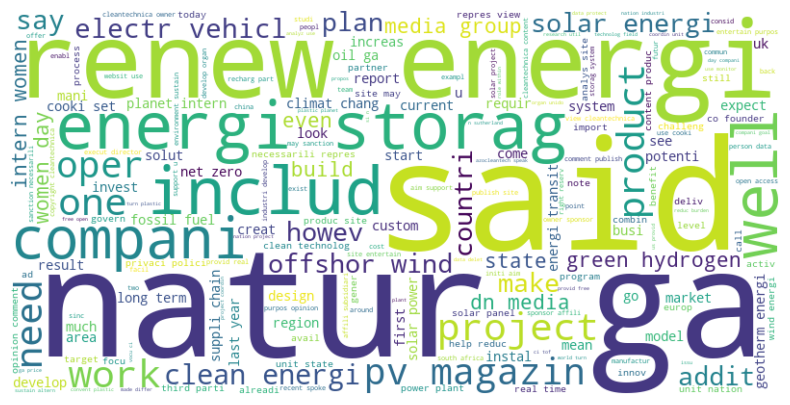

In [26]:
# Create word clouds to visualize the most frequent terms.
# Combine all cleaned content into a single string
all_text = ' '.join(data['cleaned_content'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

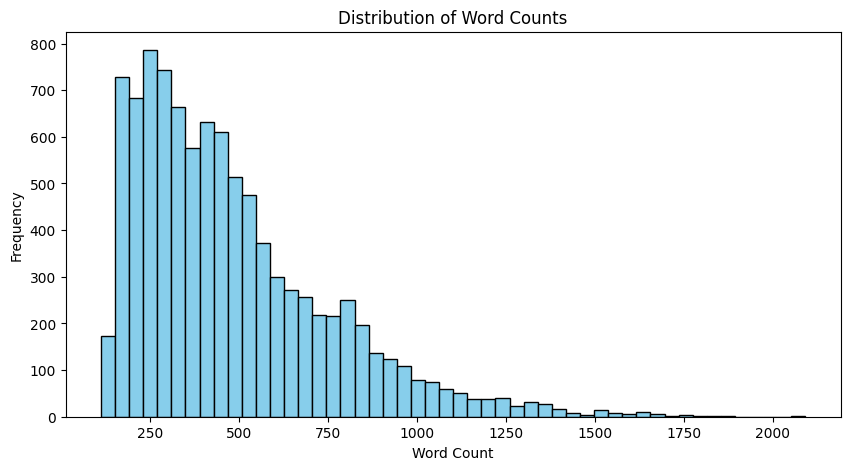

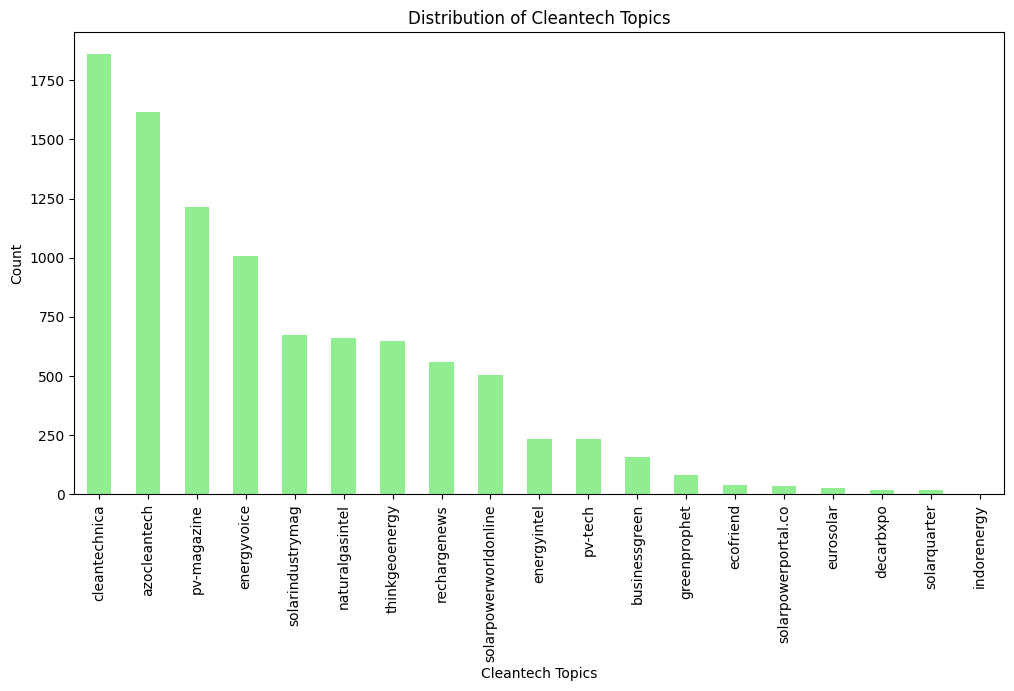

In [45]:
# Plot histogram for word counts
plt.figure(figsize=(10, 5))
plt.hist(data['word_counts'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Plot bar chart for major cleantech topics based on 'domain'
plt.figure(figsize=(12, 6))
data['domain'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Cleantech Topics')
plt.xlabel('Cleantech Topics')
plt.ylabel('Count')
plt.show()

Now we dive into the top 20 most frequent words as follow:

In [ ]:
import csv
from collections import Counter

# Assuming 'cleaned_text' is the column containing cleaned text in your DataFrame
text_data = data['content'].str.split().sum()  # Combine all cleaned_text into a list of words
word_frequencies = Counter(text_data)

# Save word frequencies to a CSV file
csv_filename = 'word_frequencies.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Word', 'Frequency'])
    for word, frequency in word_frequencies.items():
        csv_writer.writerow([word, frequency])

print(f'Word frequencies saved to {csv_filename}')

In [28]:
# Visualisation for the most frequent words

import csv
from collections import Counter

# Assuming 'cleaned_text' is the column containing cleaned text in your DataFrame
text_data = data['content'].str.split().sum()  # Combine all cleaned_text into a list of words
word_frequencies = Counter(text_data)

# Save word frequencies to a CSV file
csv_filename = 'word_frequencies.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Word', 'Frequency'])
    for word, frequency in word_frequencies.items():
        csv_writer.writerow([word, frequency])

print(f'Word frequencies saved to {csv_filename}')

Word frequencies saved to word_frequencies.csv


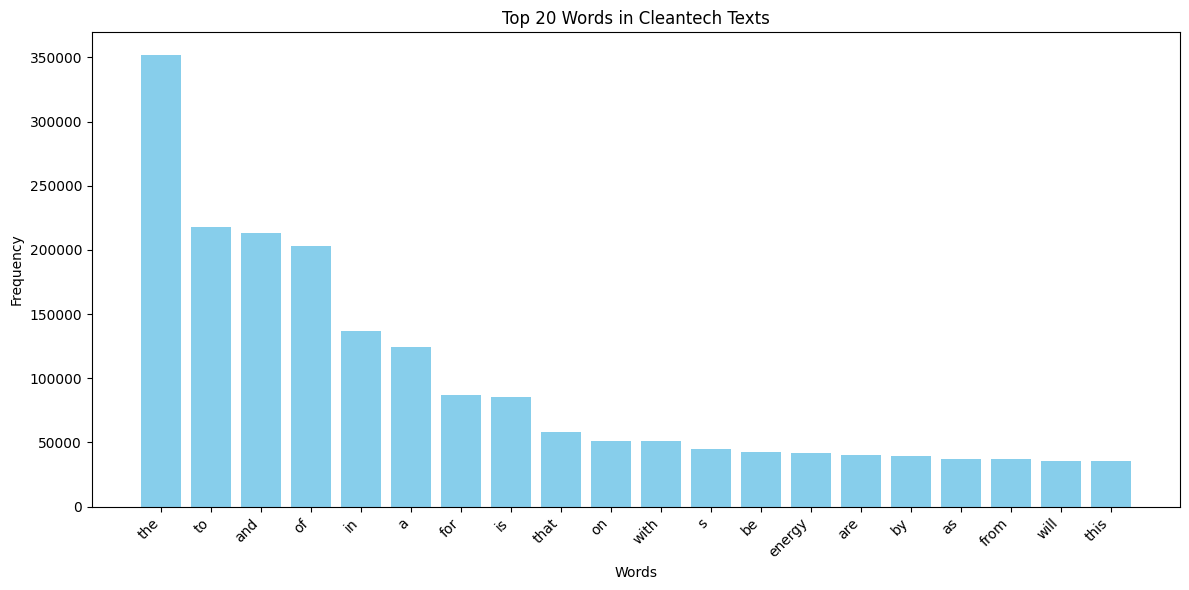

In [46]:

# Read the word frequencies CSV
word_frequencies = pd.read_csv('word_frequencies.csv')

# Sort the word frequencies by frequency in descending order
word_frequencies = word_frequencies.sort_values(by='Frequency', ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
plt.bar(word_frequencies['Word'][:20], word_frequencies['Frequency'][:20], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Cleantech Texts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


As one can see in the visualization above, Some of the most frequent word are as follows:
- energy (repeated over 62k times)
- solar (repeated over 32k times)
- new (repeated around 20k times)
- power (repeated around 20k times)
- gas (repeated around 19k times)

# Does not work for Rebecca

#!pip uninstall top2vec umap-learn hdbscan -y
!pip install top2vec

import sys
!{sys.executable} -m pip install top2vec


from top2vec import Top2Vec

# Prepare the documents
documents = data['cleaned_content'].tolist()

# Train the Top2Vec model
top2vec_model = Top2Vec(documents, speed='learn', workers=4)

In [ ]:
#!{sys.executable} -m pip install top2vec



  Using cached top2vec-1.0.34-py3-none-any.whl.metadata (18 kB)
  Using cached umap-learn-0.5.5.tar.gz (90 kB)
  Preparing metadata (setup.py) ... done
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
  Using cached numba-0.58.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata (2.7 kB)
  Using cached pynndescent-0.5.11-py3-none-any.whl.metadata (6.8 kB)
  Using cached llvmlite-0.41.1-cp310-cp310-macosx_10_9_x86_64.whl.metadata (4.8 kB)
Using cached top2vec-1.0.34-py3-none-any.whl (27 kB)
Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
Using cached numba-0.58.1-cp310-cp310-macosx_10_9_x86_64.whl (2.6 MB)
Using cached pynndescent-0.5.11-py3-none-any.whl (55 kB)
Using cached llvmlite-0.41.1-cp310-cp310-macosx_10_9_x86_64.whl (31.0 MB)
ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM T

In [ ]:
#from top2vec import Top2Vec


ModuleNotFoundError: No module named 'top2vec'

'top2vec' couldnt be installed in my environment, so I followed another approach to the content or 'title' column:

In [31]:
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'documents' is a list of cleaned text documents
documents = data['cleaned_content'].tolist()

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_documents = [word_tokenize(doc.lower()) for doc in documents]
filtered_documents = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in tokenized_documents]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(filtered_documents)
corpus = [dictionary.doc2bow(doc) for doc in filtered_documents]

# Build an LDA model
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=10)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


KeyboardInterrupt: 


# Topic Modeling

Following are the tasks for this thi last part:

o Test topic modeling techniques such as LDA and NMF , Top2Vec, and BERTopic.

o Visualize and interpret the discovered topics using techniques like word clouds or topic proportion distribution plots.

o Evaluate the quality of the topics.

o Refine the topic model based on evaluation results and domain expertise.

In [33]:
# Extract abstracts to train on and corresponding titles
titles = data["title"]

In [34]:
titles[0]

'Qatar to Slash Emissions as LNG Expansion Advances'

In [35]:
from nltk.tokenize import sent_tokenize

# data is the DataFrame with a "title" column
titles = data["title"]

# Tokenize sentences from titles
sentences = [sent_tokenize(title) for title in titles]


Usinging 'sentences' for titles to proceed with the embeddings:



In [36]:
#can be deleted

from nltk.tokenize import sent_tokenize

# Assuming data is a DataFrame with a "title" column
titles = data["title"]

# Tokenize sentences from titles
sentences = [sent_tokenize(title) for title in titles]
print(sentences)

[['Qatar to Slash Emissions as LNG Expansion Advances'], ['India Launches Its First 700 MW PHWR'], ['New Chapter for US-China Energy Trade'], ['Japan: Slow Restarts Cast Doubt on 2030 Energy Plan'], ['NYC Pension Funds to Divest Fossil Fuel Shares'], ['Japan: Supreme Court Will Likely Decide on Fukushima Liability'], ['Biden Appointees Signal Progressive Engagement'], ["The Big Picture: The New 'Great Game '"], ['Japan: Tritium Release Plans at Fukushima On Hold'], ['United States: Cold Snap Highlights Electrification Issues'], ['Taiwan: Kuosheng-1 Headed for Early Retirement'], ['Corporate: Exelon Splits Generation from Transmission'], ['Europe Targets Synthetic SAF Production for Long Term'], ["Carbon Management at Your 'Service '"], ['Santos Sanctions Barossa-to-Darwin LNG Project'], ['United States: Biden Looks to Spend Big on Clean Energy'], ['US Airlines Chart Flight Path to Net-Zero Emissions'], ['United States: Biden Folds Nuclear Into Infrastructure Plan'], ['Oil Traders Map O

In [37]:
!pip install sentence-transformers


In [47]:
# do not RUUUUN

#from sentence_transformers import SentenceTransformer

# data = DataFrame with a "title" column
#titles = data["title"]

# Tokenize sentences from titles
#sentences = [sent_tokenize(title) for title in titles]

# Flatten the list of sentences
#flat_sentences = [sentence for sublist in sentences for sentence in sublist]

# Join the sentences into a variable representing your data (e.g., title_sentences)
##title_sentences = flat_sentences

# Pre-calculate embeddings
#embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
#embeddings = embedding_model.encode(title_sentences, show_progress_bar=True)


# Controling Number of Topics



# Bert

In [39]:
from sentence_transformers import SentenceTransformer
#from nltk.tokenize import sent_tokenize

# data = DataFrame with "title" column
titles = data["title"]

# Tokenize sentences from titles
sentences = [sent_tokenize(title) for title in titles]

# Flatten the list of sentences
flat_sentences = [sentence for sublist in sentences for sentence in sublist]

# Join the sentences into a variable representing your data (e.g., title_sentences)
title_sentences = flat_sentences

# Pre-calculate embeddings in batches
batch_size = 32  # Adjust the batch size based on your available memory
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initialize an empty list to store embeddings
all_embeddings = []

# Process sentences in batches
for i in range(0, len(title_sentences), batch_size):
    batch = title_sentences[i:i + batch_size]
    batch_embeddings = embedding_model.encode(batch, show_progress_bar=True)
    all_embeddings.extend(batch_embeddings)

# Now, all_embeddings contains the embeddings for all sentences


Batches: 100%|██████████| 1/1 [00:00<00:00, 46.36it/s]


In [ ]:
##